工作原理：存在一个含有标签的样本训练集，并一直样本训练集的所属类别。现在我们输入没有标签的新数据，并对新数据的而每个特征值同样本数据集每个特征值进行比较（可以为他们的欧氏距离），选取样本中k个（通常不大于20）最相似的数据（即距离最短），然后从k个数据中，选取出现最多的分类，作为新数据的分类

In [267]:
from numpy import *
import operator
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
#用来显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [5]:
def createDataSet():  
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])  
    labels = ['A','A','B','B']  
    return group,labels

In [6]:
group,labels = createDataSet()

In [26]:
group[:,1]
# group[:,0]
group.shape[0]

4

In [8]:
labels

['A', 'A', 'B', 'B']

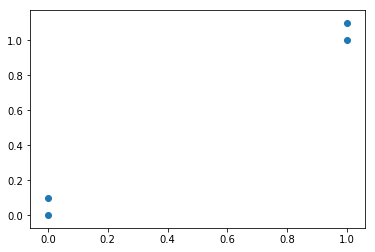

In [24]:
# 创建画布
fig = plt.figure()
# 分割画布 一行一列第一单元
ax = fig.add_subplot(111)
# 画出散点图
ax.scatter(group[:,0], group[:,1])
plt.show()

归一化公式    
$newValue = \dfrac{oldValue-min}{max-min}$

In [201]:
#knn
def classify(inX, dataSet, labels, k):
    #计算距离
    dataSetSize = dataSet.shape[0]#样本数量
    diffMat = tile(inX, (dataSetSize,1)) - dataSet#tile函数，在行上重复dataSize次，列重复一次，求输入向量与样本的差值(x0-x1),(y0-y1)
    sqDiffMat = diffMat**2                #(x0-x1)^2,(y0-y1)^2
    sqDistances = sqDiffMat.sum(axis=1)   #矩阵每一行向量相加
    distances = sqDistances**0.5          #开平方
    sortedDistIndicies = distances.argsort() #对每列元素进行排序返回索引值
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]] #找到排序后索引值对应前k个标签
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 #返回类别的个数，get函数返回字典指定键的值，没有则返回0
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True) #python3.5 iteritems改为items，operator.itemgetter用来定义一个函数返回第几个域的值，在sorted函数中可以理解为根据第几个域的值进行排序
    return sortedClassCount[0][0]
#读取文件
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)#返回文件行数
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()#去掉换行符
        lineFromLine = line.split('\t')#制表符分割字符串
        returnMat[index,:] = lineFromLine[0:3]    #前三列
        classLabelVector.append(int(lineFromLine[-1]))
        index += 1
    return returnMat,classLabelVector
#数值归一化
def autoNorm(dataSet):
    maxVals = dataSet.max(0)#求矩阵每列的最大值，同下
    minVals = dataSet.min(0)
    ranges = maxVals-minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]#行数
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))
    return normDataSet, range, minVals


In [210]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')


In [207]:
normMat, ranges, minVals = autoNorm(datingDataMat)
normMat[2,:]

array([0.28542943, 0.06892523, 0.47449629])

In [237]:
#测试分类器
def datingClassTest(k):
    testDataRate = 0.1
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*testDataRate)
    errCount = 0.0
    for i in ranges(numTestVecs):
        classifierResult = classify(normMat[i,:], normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],k)
#         print("分类器返回结果:%d,实际Label为:%d"%(classifierResult,datingLabels[i]))
        if(classifierResult != datingLabels[i]):
            errCount += 1.0
    print("k为%d,错误率为%f"%(k,errCount/float(numTestVecs)))

In [238]:
for k in ranges(1,10):
    datingClassTest(k)
# ranges(2)

k为1,错误率为0.080000
k为2,错误率为0.080000
k为3,错误率为0.050000
k为4,错误率为0.040000
k为5,错误率为0.050000
k为6,错误率为0.050000
k为7,错误率为0.040000
k为8,错误率为0.050000
k为9,错误率为0.050000


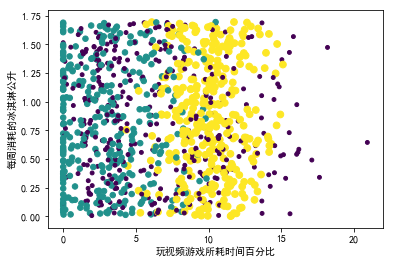

In [176]:
datingFig = plt.figure()
ax = datingFig.add_subplot(111)
ax.scatter( datingDataMat[:,1],datingDataMat[:,2],15*array(datingLabels),15*array(datingLabels))
ax.set_xlabel('玩视频游戏所耗时间百分比')
ax.set_ylabel('每周消耗的冰淇淋公升')
plt.show()

简单的手写数字识别

In [265]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    file = open(filename)
    for i in range(32):
        lineStr = file.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [266]:
img2vector('trainingDigits/0_0.txt')

array([[0., 0., 0., ..., 0., 0., 0.]])

In [283]:
def handWritingClassTest():
    hwLabels = []
    traingFileList = listdir('trainingDigits')
    m = len(traingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        #从文件名获取Label
        fileName = traingFileList[i]
        label = int(fileName.split('.')[0].split('_')[0])
        hwLabels.append(label)
        trainingMat[i,:] = img2vector('trainingDigits/%s'%fileName)
    testFileList = listdir('testDigits')
    mTest = len(testFileList)
    errCount = 0.0
    for j in ranges(mTest):
        fileName = testFileList[j]
        label = int(fileName.split('.')[0].split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s'%fileName)
        classifierRes = classify(vectorUnderTest, trainingMat, hwLabels,4)
#         print("分类器返回结果%d，实际标签为%d\n"%(classifierRes, label))
        if (classifierRes != label):
            errCount += 1.0
    print('总分类错误样本数量:%d'%errCount)
    print('错误率:%f'%(errCount/float(mTest)))

In [284]:
f = listdir('trainingDigits')[0]
f.split('.')[0].split('_')

['0', '0']

In [285]:
handWritingClassTest()

总分类错误样本数量:11
错误率:0.011628
